In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## Hipótese do Caminho Aleatório (Random Walk Hypothesis)

A **Hipótese do Caminho Aleatório** é semelhante à **Hipótese de Mercado Eficiente (EMH)**, mas é uma abordagem mais matemática e menos filosófica. Ela afirma que o movimento dos preços dos ativos, como ações, segue um "passo aleatório", o que significa que as variações nos preços não podem ser previstas de forma consistente. Essa hipótese foi popularizada pelo livro **"A Random Walk Down Wall Street"**, publicado em 1973.

<img src="https://i5.walmartimages.com/seo/A-Random-Walk-Down-Wall-Street-9780393352245_8aa7e852-fdb6-4211-b7d4-a361346c20fa_1.5d4446b76ba4614b8272945021e7295d.jpeg" alt="A Random Walk Down Walk Street" width="300" height="400">

As pessoas que não acreditam em hipotese de passo aleatorio publicaram uma resposta quase 30 anos depois no livro "A Non-Random Walk Down Walk Street" em 1999

A teoria do caminho aleatório é um caso específico do modelo **ARIMA** (Autoregressive Integrated Moving Average), que é amplamente utilizado em séries temporais. Também pode ser vista como uma aplicação de um processo de **Markov**, onde a probabilidade de um evento futuro depende apenas do estado atual, e não de eventos passados. Em outras palavras, segundo essa hipótese, o preço futuro de uma ação não pode ser previsto com base em seu histórico de preços.

### O Que é um Passo Aleatório?

Um passo aleatório pode ser descrito matematicamente como uma série de movimentos sucessivos, onde cada passo é independente dos anteriores e tem uma probabilidade fixa de ser para cima ou para baixo. O exemplo mais simples de um passo aleatório é:

$$
\begin{align}
p_0 &= \text{um valor inicial}\\
p_1 &= p_0 + e_1 \quad \text{onde} \quad e_i \in \{-1, +1\}\\
p_2 &= p_1 + e_2\\
...
\end{align}
$$

Nessa forma básica, a chance de prever o próximo movimento do preço é de 50%, indicando que não há um padrão discernível para prever o futuro dos preços.



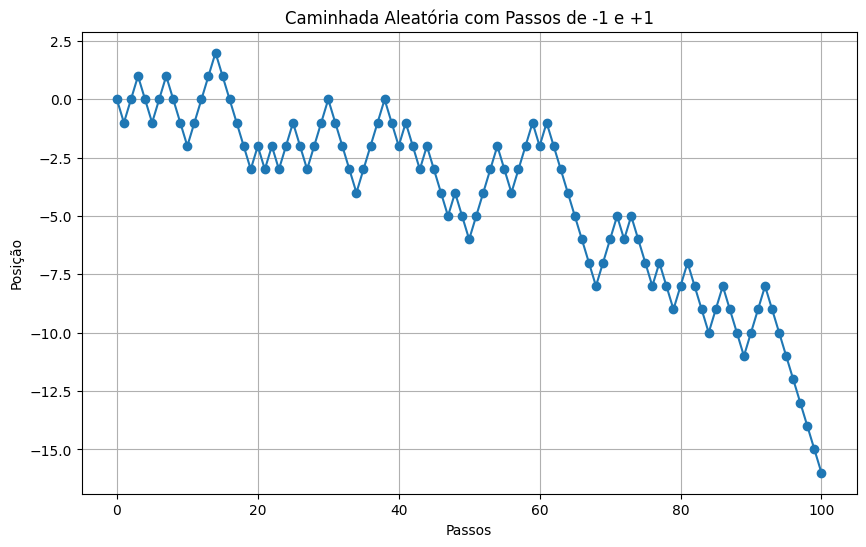

In [2]:
# Parâmetros
n_steps = 100  # número de passos na caminhada aleatória
initial_value = 0  # valor inicial da caminhada

# Gera a caminhada aleatória usando os valores -1 e +1
steps = np.random.choice([-1, 1], size=n_steps)
random_walk = np.cumsum(np.insert(steps, 0, initial_value))

# Plota a caminhada aleatória
plt.figure(figsize=(10, 6))
plt.plot(random_walk, marker='o')
plt.title("Caminhada Aleatória com Passos de -1 e +1")
plt.xlabel("Passos")
plt.ylabel("Posição")
plt.grid(True)
plt.show()


### Passo Aleatório Gaussiano

O passo aleatório pode ser refinado usando uma distribuição gaussiana, em vez de um simples valor de +1 ou -1. Nesse caso, o passo aleatório é descrito como uma variável aleatória com distribuição normal $N(0, \sigma^2)$, onde a média é zero e a variância é $\sigma^2$:

$$
\begin{align}
p_0 &= \text{um valor inicial}\\
p_1 &= p_0 + e_1 \quad \text{onde} \quad e_i \in N(0, \sigma^2)\\
p_2 &= p_1 + e_2\\
...
\end{align}
$$

Aqui, o movimento dos preços segue uma curva de distribuição normal, o que significa que pequenos desvios são mais prováveis do que grandes saltos, mas ainda assim, o próximo movimento é imprevisível.


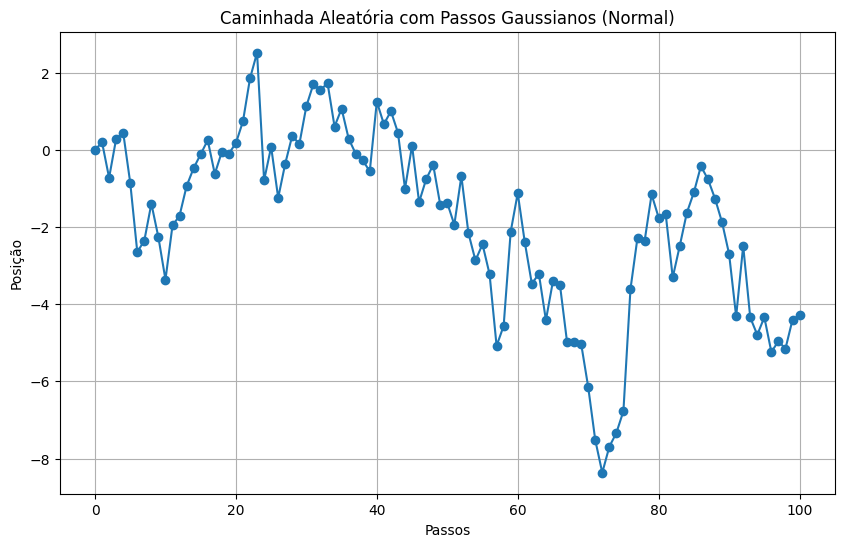

In [3]:
# Parâmetros
n_steps = 100  # número de passos na caminhada aleatória
initial_value = 0  # valor inicial da caminhada
mu = 0  # média da distribuição gaussiana
sigma = 1  # desvio padrão da distribuição gaussiana

# Gera a caminhada aleatória usando uma distribuição gaussiana
steps = np.random.normal(mu, sigma, n_steps)
random_walk = np.cumsum(np.insert(steps, 0, initial_value))

# Plota a caminhada aleatória
plt.figure(figsize=(10, 6))
plt.plot(random_walk, marker='o')
plt.title("Caminhada Aleatória com Passos Gaussianos (Normal)")
plt.xlabel("Passos")
plt.ylabel("Posição")
plt.grid(True)
plt.show()



### Passo Aleatório com Drift

Em um passo aleatório com **drift**, há uma tendência (ou drift) que se soma ao movimento aleatório dos preços. Matematicamente, isso pode ser descrito como:

$$
p_t = p_{t-1} + \mu + e_t
$$

Neste modelo, o drift \(\mu\) representa uma inclinação constante que influencia o movimento dos preços. Isso é relevante ao considerar o log-retorno de uma ação, que pode ser expresso como:

$$
r_t = \log(\frac{p_t}{p_{t-1}}) = \log(p_t) - \log(p_{t-1}) = \mu + e_t
$$

Aqui, o drift \(\mu\) corresponde à média do log-retorno, o que implica que, mesmo com a aleatoriedade, existe uma expectativa de movimento direcional (subida ou descida) no longo prazo.


In [4]:
# Função para gerar a caminhada aleatória com drift e plotar o gráfico
def plot_random_walk(mu, sigma):
    n_steps = 100  # número de passos
    initial_value = 0  # valor inicial
    sigma = 1  # desvio padrão da distribuição gaussiana

    # Gera a caminhada aleatória com drift usando uma distribuição gaussiana
    steps = np.random.normal(mu, sigma, n_steps)
    random_walk = np.cumsum(np.insert(steps, 0, initial_value))

    # Plota a caminhada aleatória com drift
    plt.figure(figsize=(10, 6))
    plt.plot(random_walk, marker='o')
    plt.title(f"Caminhada Aleatória com Drift ($\\mu = {mu}$) e Passos Gaussianos")
    plt.xlabel("Passos")
    plt.ylabel("Posição")
    plt.grid(True)
    plt.show()

# Cria o controle deslizante para ajustar o valor do drift (mu)
interact(plot_random_walk, mu=widgets.FloatSlider(value=0, min=-1.0, max=1.0, step=0.05, description='Drift (mu)'),
         sigma = widgets.FloatSlider(value=0, min=0.1, max=10.0, step=0.5, description='std (sigma)'));


interactive(children=(FloatSlider(value=0.0, description='Drift (mu)', max=1.0, min=-1.0, step=0.05), FloatSli…


### A Hipótese do Caminho Aleatório é Correta?

A hipótese do caminho aleatório se baseia na suposição de que os log-retornos das ações são **iid** (independentes e identicamente distribuídos). No entanto, essa premissa não se sustenta totalmente na prática, pois observamos fenômenos como **agrupamento de volatilidade** e **autocorrelação** no mercado. Esses eventos indicam que, em certas condições, pode haver previsibilidade nos preços, ainda que limitada.

O caminho aleatório é um caso particular de uma **cadeia de Markov**, em que a probabilidade de um estado futuro depende apenas do estado atual e não do histórico completo. Essa propriedade pode ser expressa da seguinte forma:

$$
P(X_{t+1} = x | X_t = x_t, X_{t-1} = x_{t-1}, ..., X_0 = x_0) = P(X_{t+1} = x | X_t = x_t)
$$

Com base nisso, podemos dizer que o preço \(x(t)\) segue uma distribuição normal centrada no preço anterior:

$$
x(t) \sim N(x(t-1), \sigma^2)
$$

A variância do preço em um futuro \(t+\tau\) pode ser calculada como a soma das variâncias dos erros aleatórios ao longo do tempo:

$$
var(x(t + \tau)) = \sum_{k=1}^\tau var(e(t+k)) = \tau \sigma^2
$$

Portanto, a incerteza sobre o preço futuro aumenta com o tempo, com o desvio-padrão crescendo de forma proporcional à raiz quadrada do tempo, $sd(x(t+\tau)) = \sqrt{\tau} \sigma$.



## Como identificar um caminho aleatório?

Pela definição, um caminho aleatorio é uma serie que a primeira diferença dela é `estacionario` e não tem `autocorrelação`. Para verificar se uma serie é um caminho aleatorio, podemos seguir os seguintes passos:

1. **Plotar a série temporal**: Visualizar a série para identificar padrões ou tendências.
2. **Plotar a autocorrelação**: Verificar se há correlação entre os valores da série em diferentes intervalos de tempo.
3. **Teste de Dickey-Fuller**: Aplicar o teste de estacionariedade de Dickey-Fuller para verificar se a série é estacionária.
4. **Teste de Ljung-Box**: Aplicar o teste de independência de Ljung-Box para verificar se a série é independente.

Se a série passar por esses testes, podemos concluir que ela se comporta como um caminho aleatório. No entanto, é importante ressaltar que a hipótese do caminho aleatório é uma simplificação e não reflete totalmente a complexidade do mercado financeiro.

Agora vamos detalhar cada um desses passos para identificar um caminho aleatório em uma série temporal.


- O que é estacionariedade? Uma série temporal é considerada estacionária se suas propriedades estatísticas, como média e variância, são constantes ao longo do tempo. Isso implica que a série não possui tendência ou sazonalidade, o que facilita a análise estatística e a previsão de seus valores futuros. Quando uma série não é estacionária, é comum aplicar transformações, como diferenciação ou logaritmo, para torná-la estacionária. Diferenciação é o processo de subtrair o valor atual do valor anterior da série, o que pode ajudar a remover tendências e tornar a série estacionária. Matematicamente dizendo, a diferenciação de ordem d é definida como: 
$$
y_t' = y_t - y_{t-d},
$$ 
onde $y_t$ é o valor da série no tempo $t$ e $y_t'$ é o valor diferenciado. A estacionariedade é uma propriedade fundamental para muitos modelos de séries temporais, pois facilita a análise e a previsão dos dados. Muitos modelos de séries temporais, como ARIMA e GARCH, assumem que a série é estacionária para produzir previsões precisas. Existem vários testes estatísticos, como o teste de Dickey-Fuller, que podem ser usados para verificar se uma série é estacionária. Se a série não for estacionária, é comum aplicar transformações, como diferenciação ou logaritmo, para torná-la estacionária antes de modelá-la.


- O que é o teste de Dickey-Fuller? O teste de Dickey-Fuller é um teste estatístico usado para verificar se uma série temporal é estacionária. Ele avalia a presença de raízes unitárias na série, o que indica que a série não é estacionária. O teste de Dickey-Fuller compara a série original com uma série diferenciada para determinar se a diferenciação torna a série estacionária. Se o valor-p do teste for menor que um determinado nível de significância, a série é considerada estacionária. Caso contrário, a série é considerada não estacionária e pode exigir transformações adicionais para torná-la estacionária. A raíz unitaria basicamente é a coeficiente de autoregressão $\alpha_1$. Quando $-1< \alpha_1 <1$, a série não estacionária.

$$
y_t = C + \underbrace{\alpha_1}_{raiz} y_{t-1} + \epsilon_t
$$


In [5]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller


Vamos gerar dois exemplos de séries temporais para ilustrar o conceito de caminho aleatório e como identificá-lo. Uma série será um caminho aleatório puro, enquanto a outra terá uma uma raiz maior (ou igual) zero. Em seguida, aplicaremos os testes de estacionariedade para verificar se as séries são estacionárias ou não.

In [6]:
def simulate_timeseries(is_stationary: bool) -> np.array:
    np.random.seed(0)
    process = np.empty(400)
    
    if is_stationary:
        alpha = 0.8
        process[0] = 0
    else:
        alpha = 1
        process[0] = 0
        
    for i in range(400):
        if i+1 < 400:
            process[i+1] = alpha*process[i] + np.random.standard_normal()
        else:
            break
        
    return process

In [7]:
stationary = simulate_timeseries(True)
non_stationary = simulate_timeseries(False)

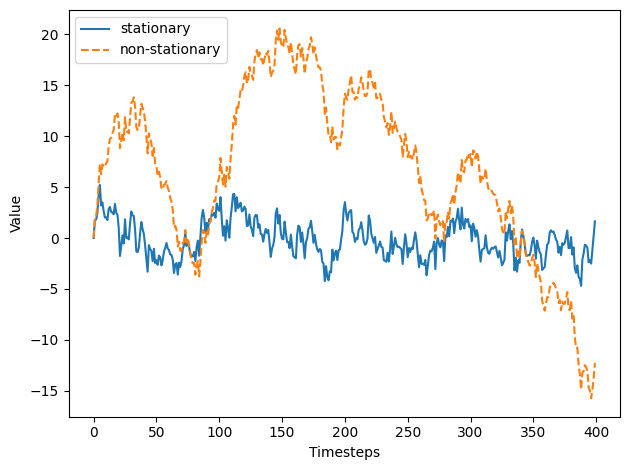

In [8]:
fig, ax = plt.subplots()

ax.plot(stationary, linestyle='-', label='stationary')
ax.plot(non_stationary, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)

plt.tight_layout()

Agora vamso definir uma função para calcular a media de um processo ao longo do tempo.

In [9]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []
    
    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))
    
    return mean_func

In [10]:
stationary_mean = mean_over_time(stationary)
non_stationary_mean = mean_over_time(non_stationary)

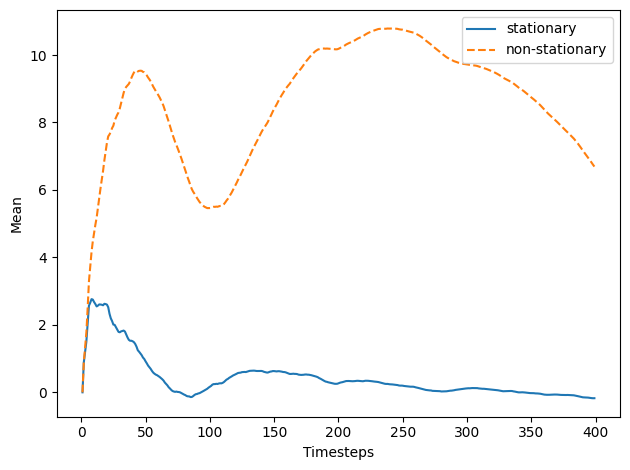

In [11]:
fig, ax = plt.subplots()

ax.plot(stationary_mean, label='stationary')
ax.plot(non_stationary_mean, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()

Para verificar a variança de um processo ao longo do tempo, podemos usar a seguinte função:

In [12]:
def var_over_time(process: np.array) -> np.array:
    var_func = []
    
    for i in range(len(process)):
        var_func.append(np.var(process[:i]))
    
    return var_func

In [13]:
stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)

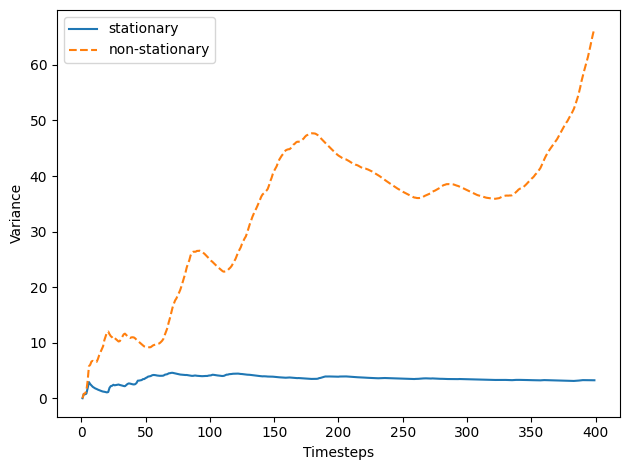

In [14]:
fig, ax = plt.subplots()

ax.plot(stationary_var, label='stationary')
ax.plot(non_stationary_var, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Variance')
ax.legend(loc=2)

plt.tight_layout()

Agora vamos ver como o teste de Dickey-Fuller se comporta para um caminho aleatório e um caminho aleatório com raiz unitária.

In [15]:
ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.184969465391296
p-value: 0.21174582965108107


Como já mencionamos um caminho aleatorio não é estacionario, então o teste de Dickey-Fuller deve rejeitar a hipotese nula de que a série é estacionaria. Para que o teste de Dickey-Fuller aceite a hipotese nula, a série deve ser estacionaria. Para transformar uma série não estacionaria em estacionaria, podemos aplicar a diferenciação.

In [16]:
diff_random_walk = np.diff(random_walk, n=1)

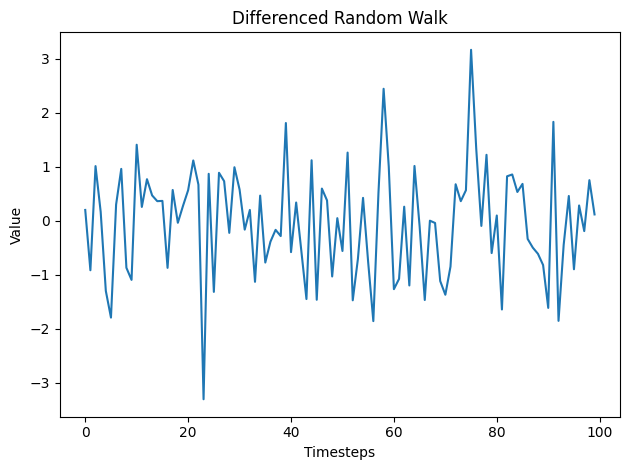

In [17]:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

E testamos de novo o teste de Dickey-Fuller para verificar se a série é estacionaria.

In [18]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -10.644137498131512
p-value: 4.84442185153041e-19


### Função de Autocorrelação (ACF)

O que é autocorrelação? A autocorrelação é uma medida estatística que avalia a correlação entre os valores de uma série temporal em diferentes intervalos de tempo. Ela é usada para identificar padrões e dependências nos dados, o que pode ser útil para prever futuros movimentos da série. A autocorrelação é frequentemente visualizada por meio de um gráfico de autocorrelação (ACF), que mostra a correlação entre os valores da série em diferentes defasagens. a ACF é util quando a series é estacionaria.

A ACF pode ser usada para:
- Verificar a presença de dependências de longo prazo.
- Identificar padrões de sazonalidade ou ciclos.
- Determinar o número apropriado de lags em modelos AR (Auto-Regressive).

Se a série for não estacionária, a ACF normalmente decai lentamente ou não decai, indicando que as observações são fortemente correlacionadas em longos períodos de tempo. Se for estacionária, a ACF tenderá a decair rapidamente. 


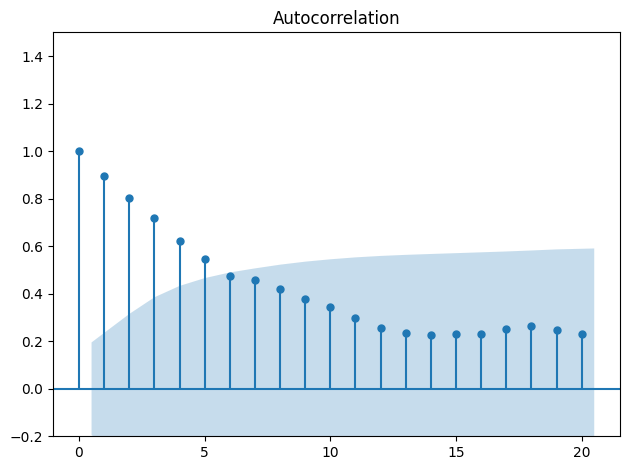

In [19]:
plot_acf(random_walk, lags=20);

plt.ylim(-0.2, 1.5)
plt.tight_layout()

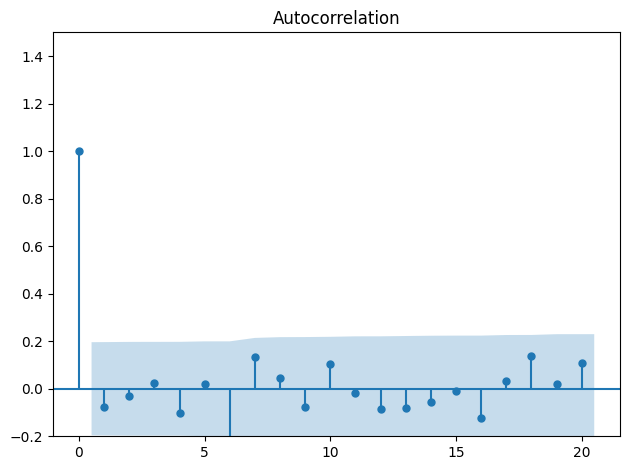

In [20]:
plot_acf(diff_random_walk, lags=20);

plt.ylim(-0.2, 1.5)
plt.tight_layout()

## Estudo de Caso: Serie Temporal de Preços da AMAZON

Aqui vamos ver se a série de preços de ações da AMAZON é um caminho aleatorio.

In [21]:
import yfinance as yf

In [22]:
df = yf.download('AMZN', start='2021-10-01', end='2024-08-01')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,164.450500,165.458496,162.796997,164.162994,164.162994,56712000
2021-10-04,163.969498,163.999496,158.812500,159.488998,159.488998,90462000
2021-10-05,160.225006,163.036499,160.123001,161.050003,161.050003,65384000
2021-10-06,160.676498,163.216995,159.931000,163.100494,163.100494,50660000
2021-10-07,164.576996,166.287506,164.153000,165.121506,165.121506,48182000


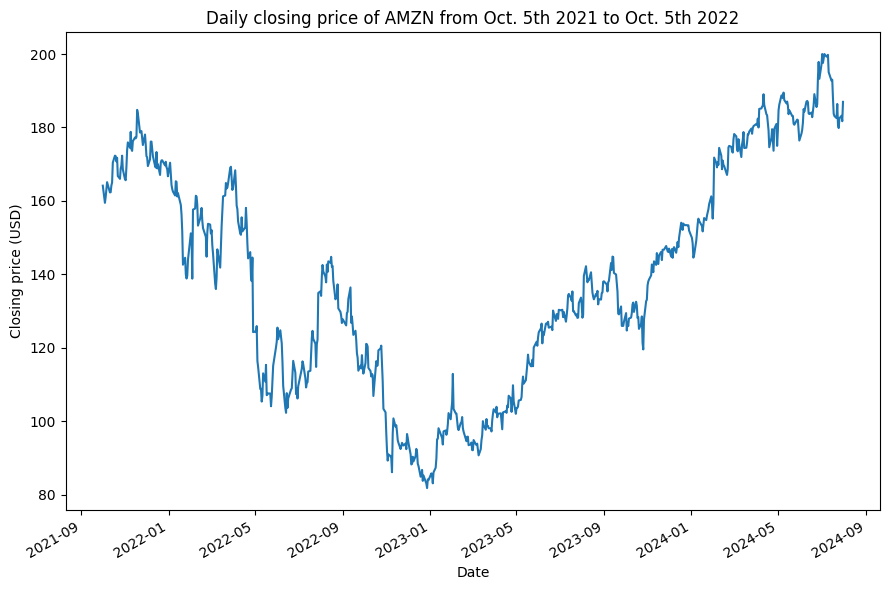

In [23]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(df.index, df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.title('Daily closing price of AMZN from Oct. 5th 2021 to Oct. 5th 2022')
fig.autofmt_xdate()
plt.tight_layout()

Será que esse serie é um caminho aleatorio?

In [24]:
AMZN_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {AMZN_ADF_result[0]}')
print(f'p-value: {AMZN_ADF_result[1]}')

ADF Statistic: -1.0541795647135164
p-value: 0.7329946173274371


E para a primeira difenreça temos

In [25]:
diff_close = np.diff(df['Close'], n=1)


AMZN_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {AMZN_diff_ADF_result[0]}')
print(f'p-value: {AMZN_diff_ADF_result[1]}')

ADF Statistic: -27.100286784118676
p-value: 0.0


Autocorrelação da primeira diferença é 

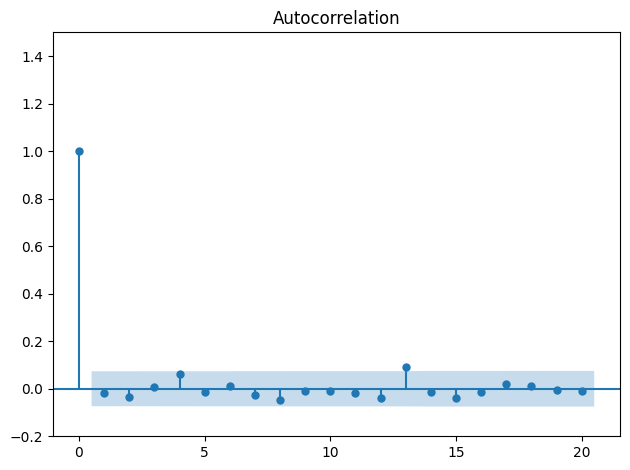

In [26]:
plot_acf(diff_close, lags=20);

plt.ylim(-0.2, 1.5)
plt.tight_layout()

## Forecasting um caminho aleatorio

Obviamente, prever um caminho aleatório é uma tarefa impossível, pois a natureza aleatória dos movimentos de preços impede qualquer previsão precisa. No entanto, aqui vamos testar os nossos modelos de baseline para prever um caminho aleatório.

In [27]:
# Parâmetros
n_steps = 1000  # número de passos na caminhada aleatória
initial_value = 0  # valor inicial da caminhada
mu = 0  # média da distribuição gaussiana
sigma = 1  # desvio padrão da distribuição gaussiana

# Gera a caminhada aleatória usando uma distribuição gaussiana
steps = np.random.normal(mu, sigma, n_steps)
random_walk = np.cumsum(np.insert(steps, 0, initial_value))


df = pd.DataFrame({'value': random_walk})

train = df[:800]
test = df[800:]

In [28]:
train.shape, test.shape

((800, 1), (201, 1))

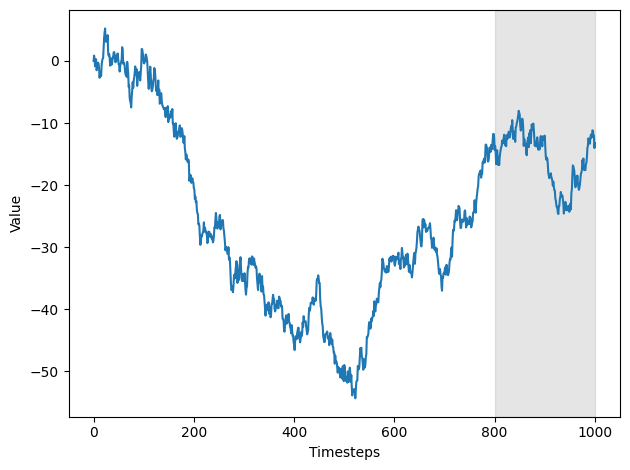

In [29]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.tight_layout()

O primeiro modelo naive que vamos usar é a média dos valores anteriores.

In [30]:
mean = np.mean(train.value)

test.loc[:, 'pred_mean'] = mean

test.head()

,value,pred_mean
800,-14.357514,-27.149875
801,-13.767810,-27.149875
802,-14.664180,-27.149875
803,-16.626912,-27.149875
804,-15.042091,-27.149875


O proximo é repetir o ultimo valor.

In [31]:
last_value = train.iloc[-1].value

test.loc[:, 'pred_last'] = last_value

test.head()

,value,pred_mean,pred_last
800,-14.357514,-27.149875,-12.345633
801,-13.767810,-27.149875,-12.345633
802,-14.664180,-27.149875,-12.345633
803,-16.626912,-27.149875,-12.345633
804,-15.042091,-27.149875,-12.345633


O terceiro é um modelo é o drift que bascicamente é a regressão linear dos valores anteriores.

In [32]:
deltaX = 800 - 1
deltaY = last_value - 0

drift = deltaY / deltaX

x_vals = np.arange(800, 1001, 1)

pred_drift = drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift

test.head()

,value,pred_mean,pred_last,pred_drift
800,-14.357514,-27.149875,-12.345633,-12.361085
801,-13.767810,-27.149875,-12.345633,-12.376536
802,-14.664180,-27.149875,-12.345633,-12.391987
803,-16.626912,-27.149875,-12.345633,-12.407439
804,-15.042091,-27.149875,-12.345633,-12.422890


Plotando os resultados temos

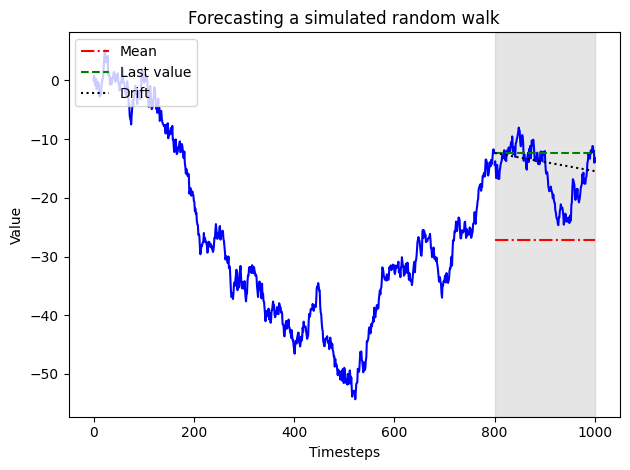

In [33]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.title('Forecasting a simulated random walk')

plt.tight_layout()

Agora vamos calcular os erros de previsão para cada um dos modelos.

In [34]:
from sklearn.metrics import mean_absolute_error

mae_mean = mean_absolute_error(test['value'], test['pred_mean'])
mae_last = mean_absolute_error(test['value'], test['pred_last'])
mae_drift = mean_absolute_error(test['value'], test['pred_drift'])

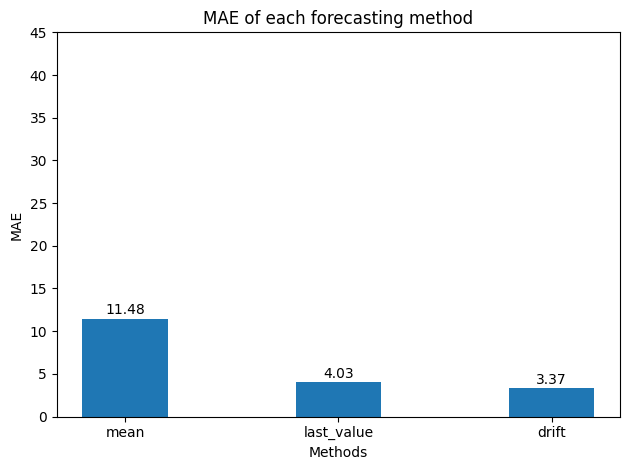

In [35]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mae_mean, mae_last, mae_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MAE')
ax.set_ylim(0, 45)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.5, s=str(round(value, 2)), ha='center')

plt.title('MAE of each forecasting method')
plt.tight_layout()

### Prevendo o preço de ações da Amazon

Agora que sabemos fazer previsão de um caminho aleatorio com um modelo simples, vamos tentar prever o preço de ações da Amazon.

In [36]:
df = yf.download('AMZN', start='2021-10-01', end='2024-08-01')

AMZN_train = df[:-50]
AMZN_test = df[-50:]

[*********************100%***********************]  1 of 1 completed


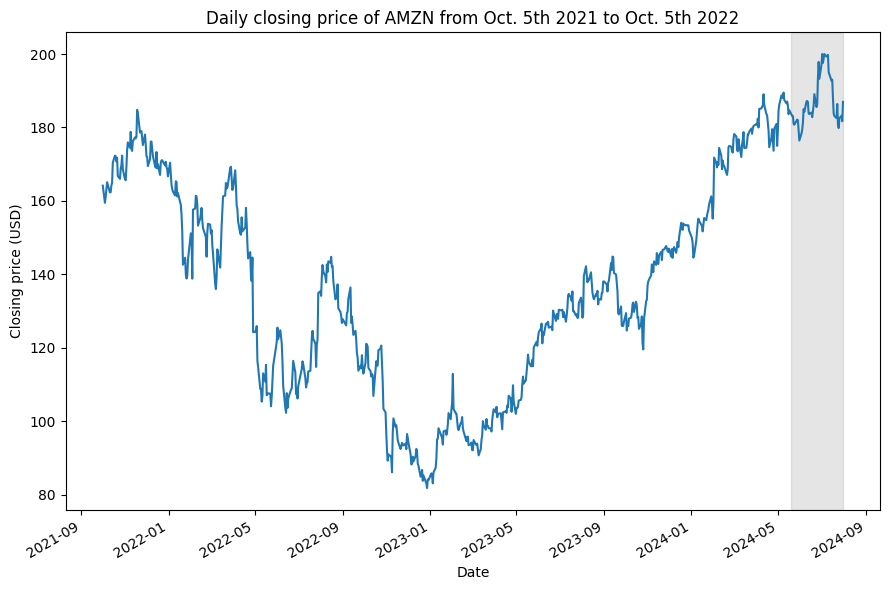

In [37]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(df.index, df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
ax.axvspan(df.index[-50], df.index[-1], color='#808080', alpha=0.2)

#ax.axvspan(203, 252, color='#808080', alpha=0.2)

plt.title('Daily closing price of AMZN from Oct. 5th 2021 to Oct. 5th 2022')

fig.autofmt_xdate()
plt.tight_layout()

**EXERCICIO**: Faça a previsão do preço de ações da Amazon usando as tecnicas acima antes de olhar a nossa solução aqui.




In [38]:
# Predict the historical mean

mean = np.mean(AMZN_train['Close'])
AMZN_test.loc[:, 'pred_mean'] = mean

# Predict the mean of the last known 50 days
mean_50 = np.mean(AMZN_train['Close'][-50:])
AMZN_test.loc[:, 'pred_mean_50'] = mean_50

# Predict the last known value
last_value = AMZN_train['Close'].iloc[-1]
AMZN_test.loc[:, 'pred_last'] = last_value

# Predict with drift
deltaX = 203 - 1
deltaY = last_value - AMZN_train['Close'].iloc[0]

drift = deltaY / deltaX

x_vals = np.arange(203, 253, 1)

pred_drift = drift * x_vals + AMZN_train['Close'].iloc[0]

AMZN_test.loc[:, 'pred_drift'] = pred_drift

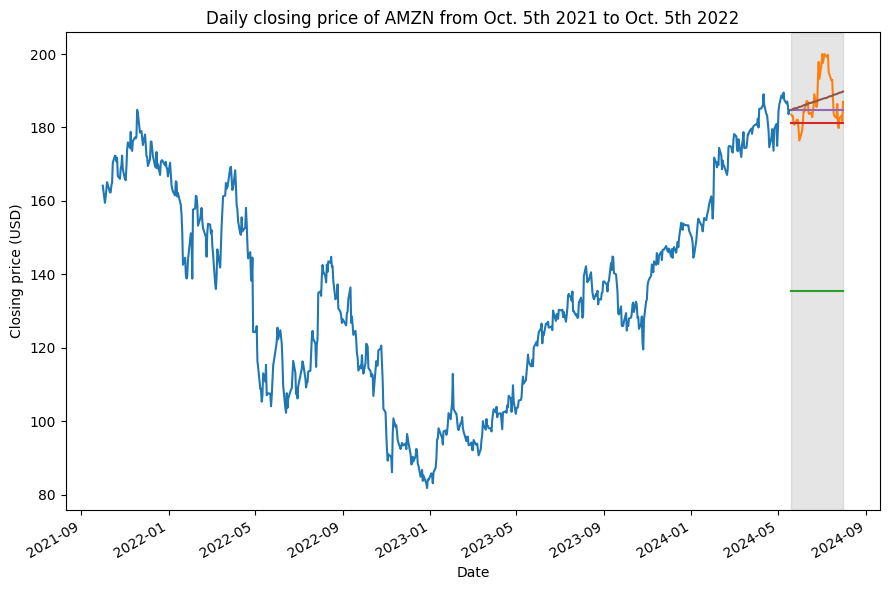

In [39]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(AMZN_train['Close'])
ax.plot(AMZN_test['Close'])
ax.plot(AMZN_test['pred_mean'])
ax.plot(AMZN_test['pred_mean_50'])
ax.plot(AMZN_test['pred_last'])
ax.plot(AMZN_test['pred_drift'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

ax.axvspan(df.index[-50], df.index[-1], color='#808080', alpha=0.2)

plt.title('Daily closing price of AMZN from Oct. 5th 2021 to Oct. 5th 2022')

fig.autofmt_xdate()
plt.tight_layout()

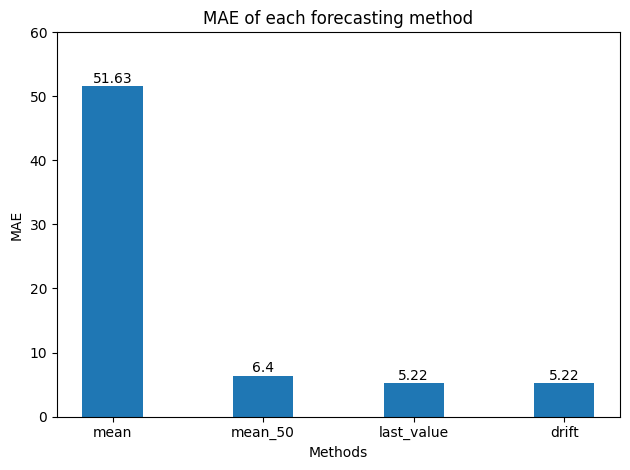

In [43]:
mae_mean = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_mean'])
mae_mean_50 = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_mean_50'])
mae_last = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_last'])
mae_drift = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_drift'])


fig, ax = plt.subplots()

x = ['mean', 'mean_50', 'last_value', 'drift']
y = [mae_mean, mae_mean_50, mae_last, mae_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MAE')
ax.set_ylim(0, 60)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.5, s=str(round(value, 2)), ha='center')

plt.title('MAE of each forecasting method')
plt.tight_layout()

### Prever somente o proximo passo!

Vamos ver que usando os modelos simples a previsão do proximo passo é a mesma coisa que a previsão do ultimo valor. O que vamos fazer aqui é um procedimento que NÂO devemos fazer no mundo real!

In [55]:
df_random = pd.DataFrame({'value': random_walk})
df_shift = df_random.shift(periods=1)

df_shift.head()

,value
0,NaN
1,0.000000
2,0.852552
3,0.253898
4,-0.861999


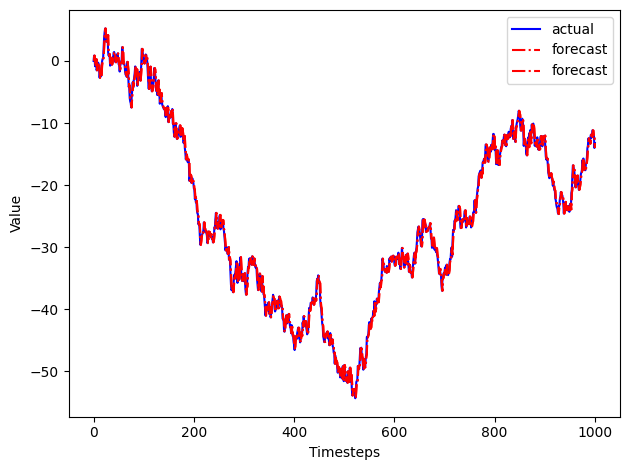

In [54]:
fig, ax = plt.subplots()


ax.plot(df_random, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc='best')

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc='best')

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

A evaluação do modelo é feita com o erro médio absoluto (MAE).

In [53]:
mae_one_step = mean_absolute_error(test['value'], df_shift[800:])

mae_one_step

np.float64(0.7943503391292244)

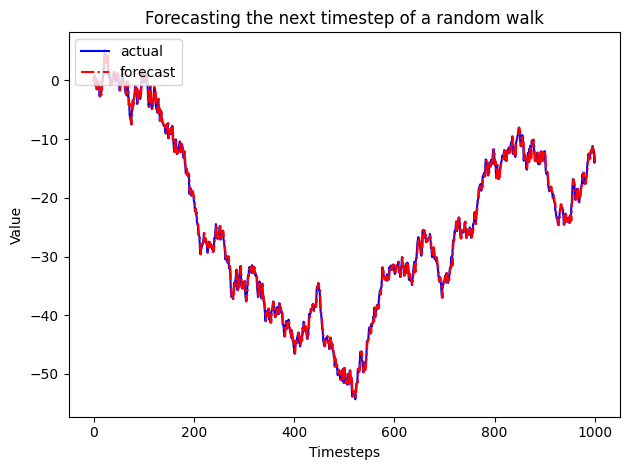

In [56]:
fig, ax = plt.subplots()

ax.plot(df_random, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)


ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.title('Forecasting the next timestep of a random walk')

plt.tight_layout()

### Reflexão Final

Apesar da forte base matemática da hipótese do caminho aleatório, o mercado financeiro é complexo e apresenta dinâmicas que desafiam a completa aleatoriedade, como o comportamento irracional dos investidores, eventos exógenos e o impacto de informações privilegiadas. O **Teorema do Limite Central** sugere que, a longo prazo, a soma de distribuições não-normais tende a uma distribuição normal, o que apoia parcialmente a hipótese de caminho aleatório, mas não elimina a possibilidade de alguma previsibilidade em certas condições de mercado.

Embora muitos bancos e gestores recomendem o investimento ativo, a hipótese do caminho aleatório sugere que tais estratégias são, muitas vezes, ineficazes a longo prazo.